In [2]:
%load_ext autoreload  
# Load the autoreload extension to automatically reload modules before executing user code.

%autoreload 2  
# Set autoreload to mode 2, which reloads all imported modules before executing a new code block.

import sys  
sys.path.append('../')  
# Add the parent directory to the system path to allow importing 'class_func.py' from the upper directory.

import OCPY as op  
# Import the 'class_func.py' module and alias it as 'op' for easier reference.

import numpy as np  
# Import NumPy for numerical operations.

from matplotlib import pyplot as plt  
# Import the plotting module from Matplotlib for visualizing data.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
epochs = np.linspace(-30000, 55000, 60000)  
# Create an array of epochs where the model will be applied.

In [4]:
func = op.OC_model(epochs=epochs)  
# Create an OC_model object to represent the overall O-C (Observed minus Calculated) model.
# The 'epochs' array is passed to define the time values where the model will be evaluated.

lin = op.Lin(params={"dT": 0.003, "dP": 0.00005})  
# Create a linear model component with dT (time shift) = 0.003 and dP (period change) = 0.00005.
# This component will be added to the OC model.

quad = op.Quad(params={"Q": 1e-9})  
# Create a quadratic model component with Q (quadratic term affecting period evolution) = 1e-9.
# This represents a long-term change in the period.

lite = op.LiTE(params={"amp": 0.4, "P_LiTE": 20000, "T_LiTE": 20000, "e": 0.35, "omega": 34})  
# Create a LiTE (Light-Time Effect) model component with:
# - amp = 0.4 (amplitude of the effect)
# - P_LiTE = 20000 (orbital period in epochs)
# - T_LiTE = 20000 (time of periastron passage in epochs)
# - e = 0.35 (eccentricity)
# - omega = 34 (argument of periapsis in degrees)
# This component simulates the effect of an unseen companion on the timing variations.

func.add_model_component(lin)  
# Add the linear model component to the OC model.

func.add_model_component(quad)  
# Add the quadratic model component to the OC model.

func.add_model_component(lite)  
# Add the LiTE model component to the OC model.


e= 0.35


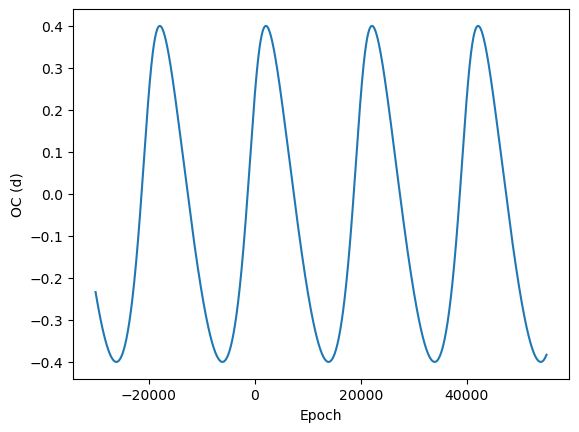

In [5]:
lite.plot(epochs)  
# Plot the LiTE (Light-Time Effect) model component over the given epochs.
# This will visualize how the LiTE effect evolves over time.

In [6]:
print(func.model_components)  
# This prints the list of model components added to the OC model.
# Each component's 'name' parameter can be accessed to see its type and identifier.

[Lin, Quad, LiTE]


In [7]:
lite.name = "LTE"  
# The name of a model component can be easily changed by assigning a new value to the 'name' attribute.

print(func.model_components)  
# Print the list of model components in the OC model.
# The updated name of the 'lite' component should now be reflected in the output.

[Lin, Quad, LTE]


In [8]:
func.summary()  
# Retrieve a summary of the OC model, which includes details about the added model components.
# This function provides an overview of the model structure and parameters.

{'Model Name': 'OC_Model', 'Model Components': ['Lin', 'Quad', 'LTE']}

e= 0.35


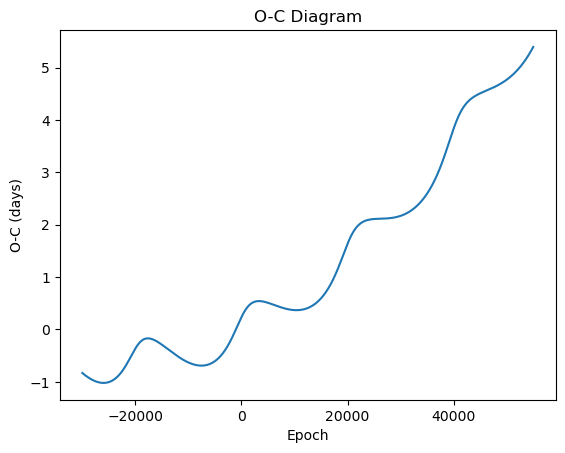

In [9]:
res = func.calculate_oc()  
# Compute the O-C (Observed minus Calculated) values using the added model components.
# This sums up the contributions from all components to generate the final O-C data.

plt.plot(epochs, res)  
# Plot the computed O-C values against the epochs.

plt.xlabel("Epoch")  # Label the x-axis as "Epoch".
plt.ylabel("O-C (days)")  # Label the y-axis as "O-C (days)".
plt.title("O-C Diagram")  # Add a title to the plot.
plt.show()  
# Display the plot.

In [10]:
lite2 = op.LiTE(params={"amp": 3, "P_LiTE": 60000, "T_LiTE": 10000, "e": 0.35, "omega": 34})  
# Create a new LiTE (Light-Time Effect) model component to be added to the OC model.
# Parameters:
# - amp = 3 (amplitude of the effect)
# - P_LiTE = 60000 (orbital period in epochs)
# - T_LiTE = 10000 (time of periastron passage in epochs)
# - e = 0.35 (eccentricity)
# - omega = 34 (argument of periapsis in degrees)

lite2.name = "LTE2"  
# Rename this LiTE component to "LTE2" before adding it to the OC model.
# This prevents naming conflicts with an existing component.

func.add_model_component(lite2)  
# Try to add the new LiTE component to the OC model.
# If a model component with the same name already exists, an error will occur.

print(func.model_components)  
# Print the list of model components in the OC model.
# If two components had the same name, the second one's name is automatically changed to "LTE2".

[Lin, Quad, LTE, LTE2]


e= 0.35
e= 0.35


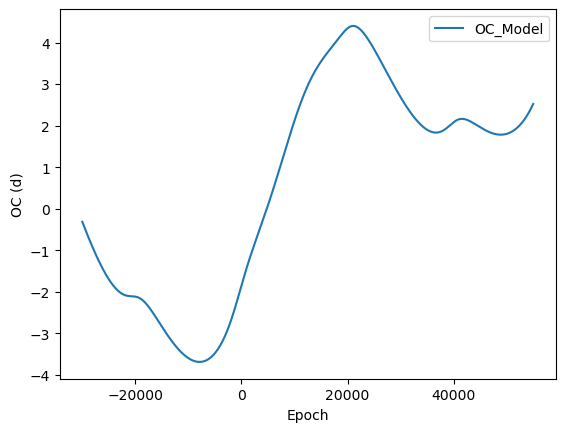

In [11]:
func.plot()  
# Plot the combined effect of all added model components in the OC model.
# This visualizes the overall O-C (Observed minus Calculated) diagram by summing the contributions of all components.

e= 0.35


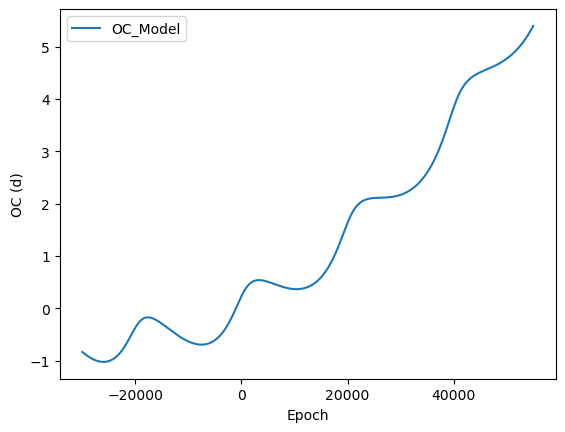

In [12]:
func.remove_model_component(by_object=lite2)  
# Remove the specified model component (lite2) from the OC model.
# This ensures that the contributions of lite2 are no longer included in the O-C calculations.
func.plot()

In [13]:
func.save_model("999_saved_model.model")  
# Save the current OC model, including all added components and their parameters, to a file.
# This allows the model to be reloaded later for further analysis.

In [14]:
loaded_model = op.OC_model.load_model("999_saved_model.model")  
# Load a previously saved OC model from the specified file.
# This restores all model components and their parameters exactly as they were saved.

e= 0.35


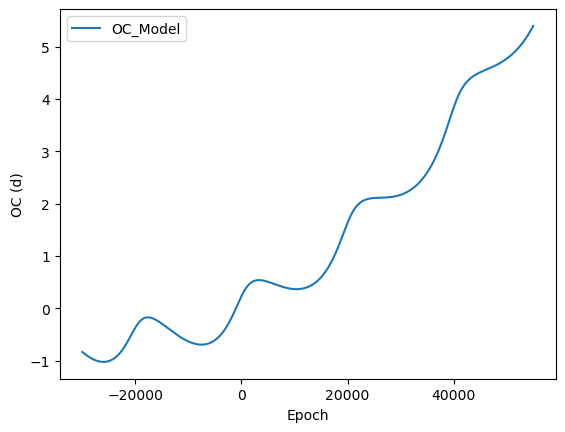

In [15]:
loaded_model.plot() 